<a href="https://colab.research.google.com/github/gopze/Projects/blob/main/Hotel_Booking_Analysis_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Bookings Exploratory Data Analysis**

# Objective
We are provided with a hotel bookings dataset.

Out main objective is perform EDA on the given dataset and draw useful conclusions about general trends in hotel bookings and how factors governing hotel bookings interact with each other.

# Dataset

We are given a hotel bookings dataset. This dataset contains booking information for a city hotel and a resort hotel. It contains the following features.

- hotel: Name of hotel ( City or Resort)
- is_canceled: Whether the booking is canceled or not (0 for no canceled and 1 for canceled)
- lead_time: time (in days) between booking transaction and actual arrival.
- arrival_date_year: Year of arrival
- arrival_date_month: month of arrival
- arrival_date_week_number: week number of arrival date.
- arrival_date_day_of_month: Day of month of arrival date
- stays_in_weekend_nights: No. of weekend nights spent in a hotel
- stays_in_week_nights: No. of weeknights spent in a hotel
- adults: No. of adults in single booking record.
- children: No. of children in single booking record.
- babies: No. of babies in single booking record.
- meal: Type of meal chosen
- country: Country of origin of customers (as mentioned by them)
- market_segment: What segment via booking was made and for what purpose.
- distribution_channel: Via which medium booking was made.
- is_repeated_guest: Whether the customer has made any booking before(0 for No and 1 for Yes)
- previous_cancellations: No. of previous canceled bookings.
- previous_bookings_not_canceled: No. of previous non-canceled bookings.
- reserved_room_type: Room type reserved by a customer.
- assigned_room_type: Room type assigned to the customer.
- booking_changes: No. of booking changes done by customers
- deposit_type: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund)
- agent: Id of agent for booking
- company: Id of the company making a booking
- days_in_waiting_list: No. of days on waiting list.
- customer_type: Type of customer(Transient, Group, etc.)
- adr: Average Daily rate.
- required_car_parking_spaces: No. of car parking asked in booking
- total_of_special_requests: total no. of special request.
- reservation_status: Whether a customer has checked out or canceled,or not showed
- reservation_status_date: Date of making reservation status.
Total number of rows in data: 119390
Total number of columns: 32

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/hotel_bookings.csv")

In [4]:
df.shape

(119390, 32)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [56]:
# Create the copy of the dataframe
df1=df.copy()

In [ ]:
df1.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
df1.is_canceled.value_counts(dropna=False)

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
df1.arrival_date_year.value_counts(dropna=False)

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [ ]:
df1.meal.value_counts(dropna=False)

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
df1.market_segment.value_counts(dropna=False)

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
df1.distribution_channel.value_counts(dropna=False)

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [ ]:
df1.children.value_counts(dropna=False)

0.0     110796
1.0       4861
2.0       3652
3.0         76
NaN          4
10.0         1
Name: children, dtype: int64

# Cleaning the Data

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: \

1) Remove duplicate rows \
2) Handling missing values. \
3) Convert columns to appropriate datatypes. \
4) Adding important columns

## 1) Remove Duplicate Rows

In [ ]:
df1[df1.duplicated()].shape

(31994, 32)

In [4]:
# Dropping duplicate values
df1.drop_duplicates(inplace=True)

In [7]:
df1.shape

(87396, 32)

## 2) Handling missing values.

In [ ]:
df1.isnull().sum().sort_values(ascending=False).head(5)

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

Since, company and agent columns have null values. There may be some cases in which the customer didnt booked hotel through any agent or company.So, null values can be kept and will be replaced by 0.


In [5]:
df1['agent'].fillna(0,inplace=True)

In [6]:
df1['company'].fillna(0,inplace=True)

In [10]:
df1.isnull().sum().sort_values(ascending=False).head(5)

country               452
children                4
hotel                   0
agent                   0
reserved_room_type      0
dtype: int64

In [ ]:
df1.children.value_counts(dropna=False)

0.0     79028
1.0      4695
2.0      3593
3.0        75
NaN         4
10.0        1
Name: children, dtype: int64

NaN values can be replaced with 0 values as 0 column is present . So customer might have forgetten to fill the column

In [7]:
df1['children'].fillna(0,inplace=True)

In [ ]:
df1.children.value_counts(dropna=False)

0.0     79032
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

In [ ]:
df1.isnull().sum().sort_values(ascending=False).head(5)

country                      452
hotel                          0
previous_cancellations         0
reservation_status             0
total_of_special_requests      0
dtype: int64

In [ ]:
df1.country.value_counts()

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64

In [8]:
df1.country.fillna('others',inplace=True)

In [13]:
df1.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [14]:
df1[df1.adults+df1.children+df1.babies==0].shape

(166, 32)

There are some rows where total number of adults,children and babies is zero. So, we will remove such rows.

In [9]:
df1.drop(df1[(df1.adults+df1.children+df1.babies)==0].index,inplace=True)

In [11]:
df1.shape

(87230, 32)

## 3) Converting columns to appropriate data types

In [ ]:
df1.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [10]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df1[['agent','company','children']]=df1[['agent','company','children']].astype('int64')

In [16]:
# changing datatype of column 'reservation_status_date' to data_type.
df1[['agent','company','children']].dtypes

agent       int64
company     int64
children    int64
dtype: object

In [11]:
df1['reservation_status_date']=pd.to_datetime(df1['reservation_status_date'],format='%Y-%m-%d')

In [15]:
df1['reservation_status_date'].dtype

dtype('<M8[ns]')

## 4) Adding important columns to the dataframe

In [12]:
# Adding total staying days in hotels
df1["total_stay"] = df1.stays_in_week_nights + df1.stays_in_weekend_nights

In [13]:
# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1["total_people"] = (df1.adults + df1.babies + df1.children)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  object        
 1   is_canceled                     87230 non-null  int64         
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  int64         
 4   arrival_date_month              87230 non-null  object        
 5   arrival_date_week_number        87230 non-null  int64         
 6   arrival_date_day_of_month       87230 non-null  int64         
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   adults                          87230 non-null  int64         
 10  children                        87230 non-null  int64         
 11  b

# EDA

In [23]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

In [28]:
num_df1.corr()

,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay,total_people
lead_time,1.000000,0.005370,-0.079021,0.080822,0.131909,0.021948,-0.086736,0.034048,0.320914,0.125262
previous_cancellations,0.005370,1.000000,0.391766,-0.010267,0.003733,-0.050359,-0.003480,0.001695,-0.021635,-0.045222
previous_bookings_not_canceled,-0.079021,0.391766,1.000000,0.005774,-0.006334,-0.086052,0.040712,0.027044,-0.064973,-0.114406
booking_changes,0.080822,-0.010267,0.005774,1.000000,0.024143,0.010144,0.050659,0.018308,0.062366,0.002619
days_in_waiting_list,0.131909,0.003733,-0.006334,0.024143,1.000000,-0.032522,-0.015995,-0.049438,-0.010599,-0.024488
adr,0.021948,-0.050359,-0.086052,0.010144,-0.032522,1.000000,0.038733,0.137461,0.056102,0.382210
required_car_parking_spaces,-0.086736,-0.003480,0.040712,0.050659,-0.015995,0.038733,1.000000,0.048479,-0.049179,0.030905
total_of_special_requests,0.034048,0.001695,0.027044,0.018308,-0.049438,0.137461,0.048479,1.000000,0.040800,0.127876
total_stay,0.320914,-0.021635,-0.064973,0.062366,-0.010599,0.056102,-0.049179,0.040800,1.000000,0.107087
total_people,0.125262,-0.045222,-0.114406,0.002619,-0.024488,0.382210,0.030905,0.127876,0.107087,1.000000


<Axes: >

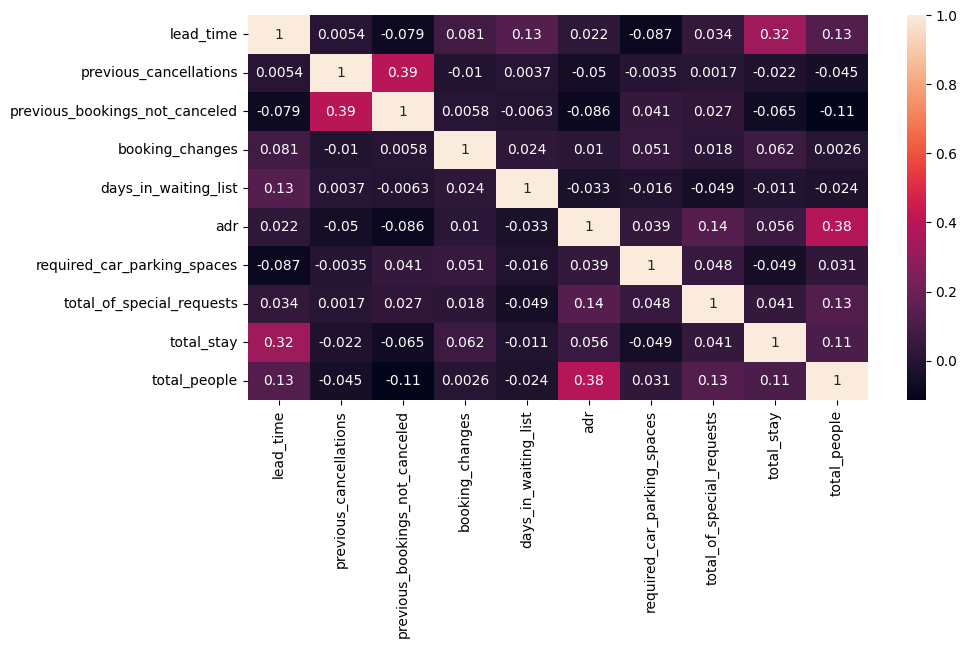

In [48]:
plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(num_df1.corr(),annot=True)

There is a slight relation between total_people and adr(average daily rate). This makes sense as more no. of people means more revenue

<Axes: xlabel='total_stay', ylabel='adr'>

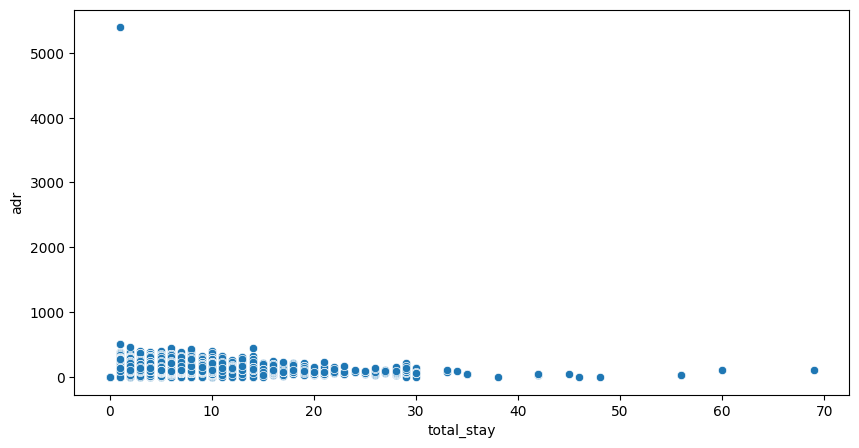

In [57]:
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(x=df1.total_stay,y=df1.adr)

In [60]:
df1[df1.adr>5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,0,0,Transient,5400.0,0,0,Canceled,2016-02-19,1,2


In [21]:
df1.drop(df1[df1.adr>5000].index,inplace=True)

<Axes: xlabel='total_stay', ylabel='adr'>

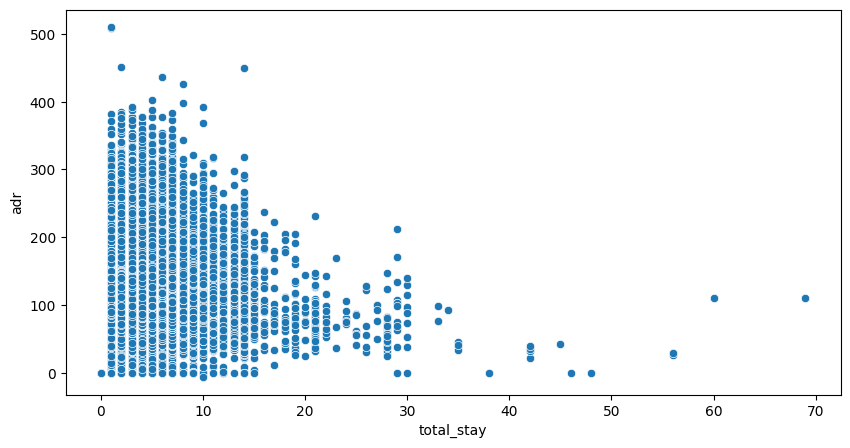

In [62]:
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(x=df1.total_stay,y=df1.adr)

From the scatter plot we can observe that as length of tottal_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.

## 1. Most no. of bookings by agent

In [23]:
top_agent=df1.agent.value_counts().sort_values(ascending=False).head(10)

<Axes: ylabel='agent'>

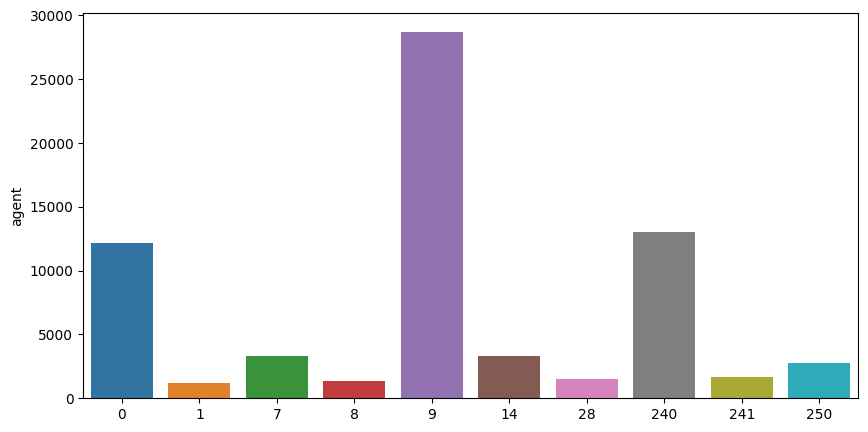

In [24]:
plt.figure(figsize = (10,5), dpi =100)
sns.barplot(x=top_agent.index,y=top_agent)

## 2. Which Room Type is in the Most Demand

In [25]:
top_room= df1.assigned_room_type.value_counts()

<Axes: ylabel='assigned_room_type'>

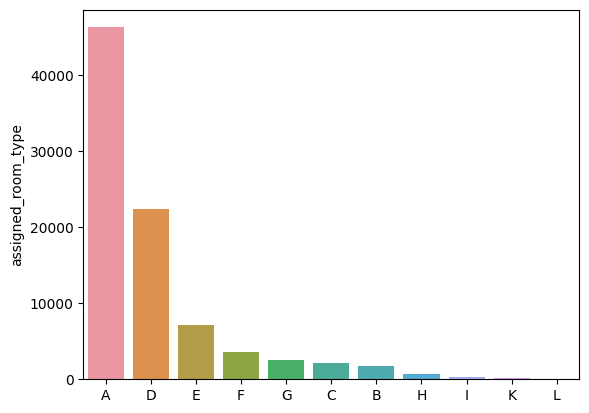

In [27]:
sns.barplot(x=top_room.index,y=top_room)

## 3. Which Room Type generates the Highest adr

<Axes: xlabel='assigned_room_type', ylabel='adr'>

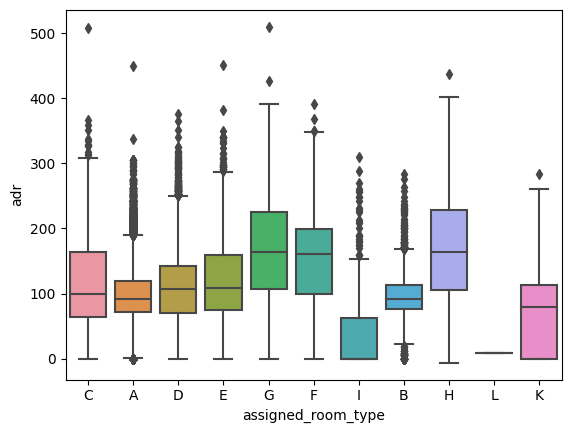

In [29]:
sns.boxplot(x=df1.assigned_room_type,y=df1.adr)

Most demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximise revenue.

## 4. Which meal type is the most prefered meal of customers?

In [31]:
meal = df1.meal.value_counts()

<Axes: ylabel='meal'>

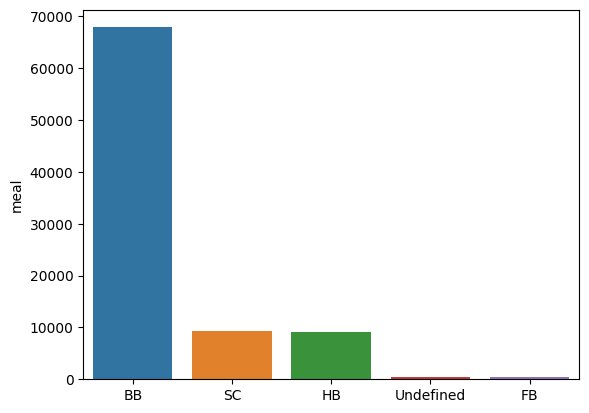

In [37]:
sns.barplot(x=meal.index,y=meal)

Most preferred meal type is BB (Bed and breakfast).

## 5. What is the percentage of bookings in each hotel?

In [65]:
((df1.hotel.value_counts()/len(df1))*100).round(2)

City Hotel      61.07
Resort Hotel    38.93
Name: hotel, dtype: float64

## 6. Which is the most common channel for booking hotels?

In [41]:
top_channel = df1.distribution_channel.value_counts()

<Axes: ylabel='distribution_channel'>

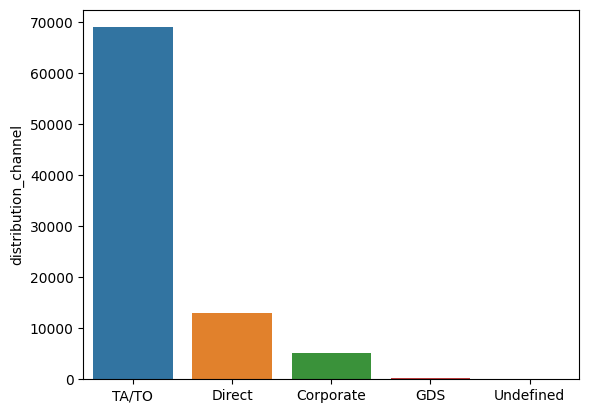

In [44]:
sns.barplot(x=top_channel.index,y=top_channel)

## 7. Which are the most busy months for Bookings?

In [45]:
busy_months = df1.arrival_date_month.value_counts()

<Axes: ylabel='arrival_date_month'>

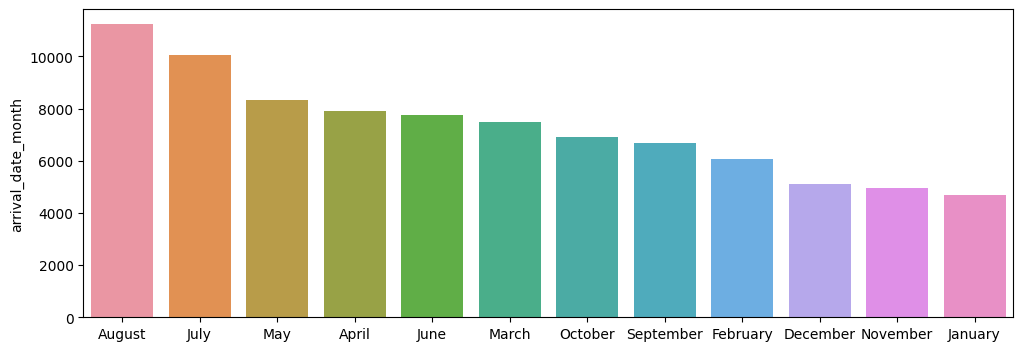

In [54]:
plt.figure(figsize = (12,4))
sns.barplot(x=busy_months.index,y=busy_months)

## 8. From which country most number of guests are coming ?

<Axes: ylabel='country'>

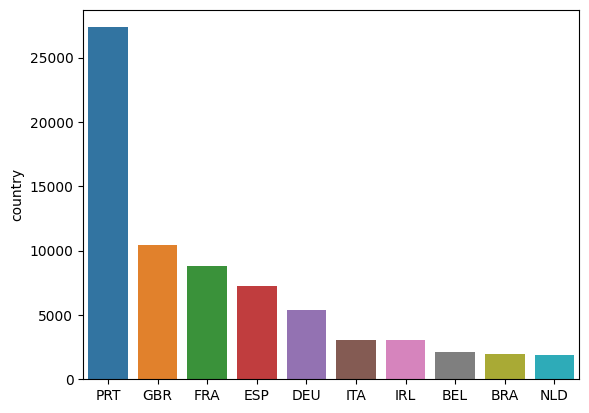

In [56]:
top_country=df1.country.value_counts().head(10)
sns.barplot(x=top_country.index,y=top_country)

## 9. How long do people stay at the hotels?

In [57]:
total_stay = df1.total_stay.value_counts()[:10]

<Axes: ylabel='total_stay'>

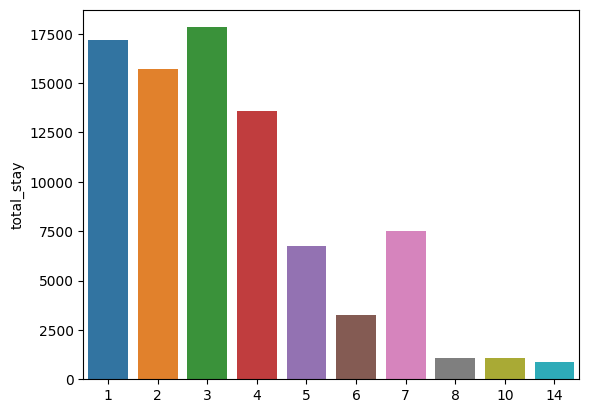

In [58]:
sns.barplot(x=total_stay.index,y=total_stay)

## 10. Which hotel seems to make more revenue?

In [63]:
df1.groupby("hotel").mean().adr.round(2)

hotel
City Hotel      111.17
Resort Hotel     99.06
Name: adr, dtype: float64

Hence, City hotel seems to be making slightly more revenue.

## 11. Which hotel has a higher lead time?

In [15]:
df1.groupby("hotel").median().lead_time

hotel
City Hotel      51.0
Resort Hotel    47.0
Name: lead_time, dtype: float64

City hotel has slightly higher median lead time. Also median lead time is significantly higher in each case, this means customers generally plan their hotel visits way to early.

## 12. What is preferred stay length in each hotel?

In [17]:
not_cancelled = df1[df1.is_canceled == 0]

In [18]:
s1=not_cancelled[not_cancelled.total_stay < 15]

<Axes: xlabel='total_stay', ylabel='count'>

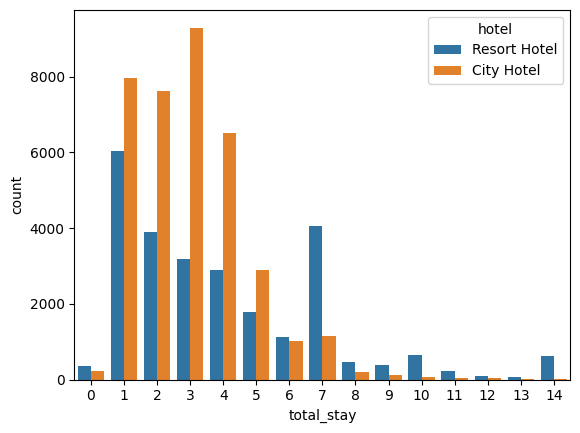

In [19]:
sns.countplot(x=s1.total_stay, hue = s1.hotel)

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

## 13. Which hotel has higher bookings cancellation rate.

In [25]:
cancelled = df1[df1.is_canceled == 1]

In [23]:
canceled_bookings = cancelled.groupby("hotel").count().is_canceled

In [24]:
canceled_bookings

hotel
City Hotel      16035
Resort Hotel     7974
Name: is_canceled, dtype: int64

In [25]:
total_bookings = df1.groupby("hotel").count().is_canceled

In [26]:
total_bookings

hotel
City Hotel      53274
Resort Hotel    33956
Name: is_canceled, dtype: int64

In [28]:
cancel_perc = (canceled_bookings/total_bookings * 100).round(2)
cancel_perc

hotel
City Hotel      30.10
Resort Hotel    23.48
Name: is_canceled, dtype: float64

In [38]:
D3 = pd.concat([canceled_bookings,total_bookings,cancel_perc],axis =1)
D3.columns = ["canceled_bookings","total_bookings","cancel_perc"]
D3

,canceled_bookings,total_bookings,cancel_perc
hotel,,,
City Hotel,16035,53274,30.10
Resort Hotel,7974,33956,23.48


## 14. Which hotel has a high chance that its customer will return for another stay

In [14]:
repeated_guest = df1[df1.is_repeated_guest == 1]

In [15]:
repeated_guests = repeated_guest.groupby("hotel").count().is_repeated_guest
repeated_guests

hotel
City Hotel      1657
Resort Hotel    1707
Name: is_repeated_guest, dtype: int64

In [16]:
total_guests = df1.groupby("hotel").count().is_repeated_guest
total_guests

hotel
City Hotel      53274
Resort Hotel    33956
Name: is_repeated_guest, dtype: int64

In [17]:
perc_repetation = (repeated_guests/total_guests * 100).round(2)
perc_repetation

hotel
City Hotel      3.11
Resort Hotel    5.03
Name: is_repeated_guest, dtype: float64

In [18]:
D4=pd.concat([repeated_guests,total_guests,perc_repetation], axis =1)

In [19]:
D4.columns = ["repeated_guests","total_guests", "perc_repetation"]
D4

,repeated_guests,total_guests,perc_repetation
hotel,,,
City Hotel,1657,53274,3.11
Resort Hotel,1707,33956,5.03


## 15. Which distribution channel brings better revenue-generating deals for hotels?

In [56]:
revenue = df1.groupby(["distribution_channel","hotel"]).mean().adr

In [61]:
D5= pd.DataFrame(revenue).reset_index()
D5

,distribution_channel,hotel,adr
0,Corporate,City Hotel,83.777368
1,Corporate,Resort Hotel,53.036835
2,Direct,City Hotel,112.606688
3,Direct,Resort Hotel,106.566215
4,GDS,City Hotel,120.317845
5,TA/TO,City Hotel,112.663552
6,TA/TO,Resort Hotel,101.578317
7,Undefined,City Hotel,29.625000
8,Undefined,Resort Hotel,112.700000


<Axes: xlabel='distribution_channel', ylabel='adr'>

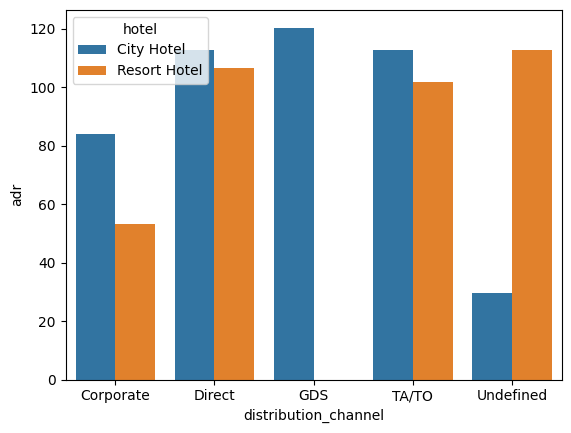

In [64]:
sns.barplot(x=D5.distribution_channel,y=D5.adr,hue=D5.hotel)

## 16. Does a longer waiting period causes the cancellation of bookings?

In [20]:
waiting_bookings = df1[df1['days_in_waiting_list'] !=0]

<Axes: xlabel='days_in_waiting_list', ylabel='Density'>

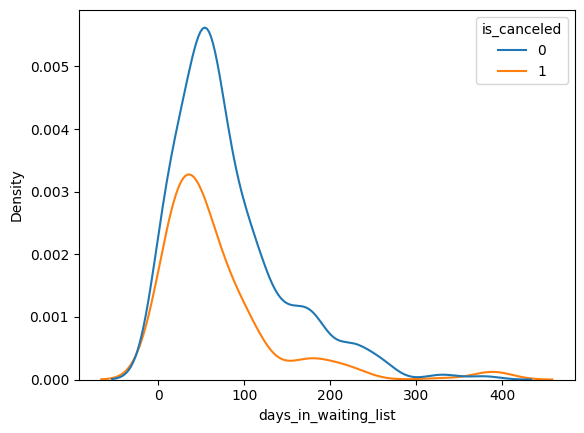

In [27]:
sns.kdeplot(x='days_in_waiting_list',data=waiting_bookings,hue='is_canceled')

We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no major effect on cancellation of bookings.


## 17. Whether not getting allotted the same room type as demand is the main cause of cancellation for bookings?

In [31]:
cancellations = df1[df1.is_canceled == 1]

In [38]:
count = 0
count1 = 0

In [39]:
cancellations["same_room_not_alloted"]=cancellations['reserved_room_type'] != cancellations['assigned_room_type']

In [40]:
cancellations["same_room_not_alloted"].value_counts()/len(cancellations) * 100

False    97.434295
True      2.565705
Name: same_room_not_alloted, dtype: float64

We see that not getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded.

## 18. Does not alloting the same room as demanded affect adr?

<Axes: xlabel='same_room_not_alloted', ylabel='adr'>

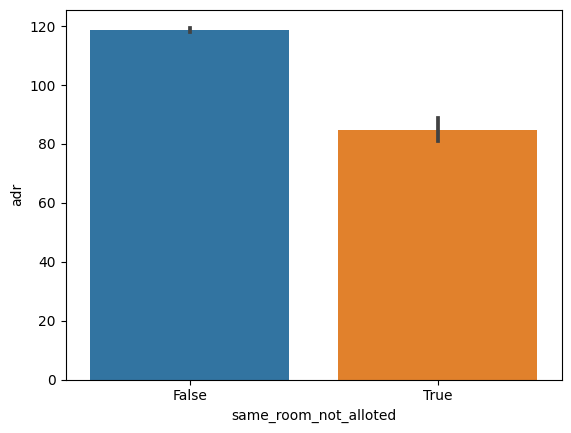

In [46]:
sns.barplot(x = 'same_room_not_alloted', y = 'adr', data = cancellations)

So not getting same room do affects the adr, people who didn't got same room have paid a little lower adr, except for few exceptions.

## 19. Which types of customers mostly make bookings?

In [47]:
not_canceled  = df1[df1.is_canceled == 0]

In [50]:
single= not_canceled[(not_canceled['adults']==1) & (not_canceled['children']==0)&(not_canceled['babies']==0)]

In [51]:
couple= not_canceled[(not_canceled['adults']==2) & (not_canceled['children']==0) & (not_canceled['babies']==0)]

In [52]:
family= not_canceled[not_canceled['adults'] + not_canceled['children'] + not_canceled['babies'] > 2]

In [53]:
len(single)

12974

In [54]:
len(couple)

40624

In [55]:
len(family)

9286

Moslty bookings are done by couples although we are not sure that they are couple as data doesn't tell about that